# Final Project
## Olivia Hogan

### Abstract

Objects in space can sometimes be oddly shaped. For example, Oumuamua is an intersteller object that is cigar shaped and is quite impressive in size. The goal for this project, was to take an object that is similiar in shape to Oumuamua and have an object rotate around it. This would represent a moon or another object orbiting the original fixed object. The gravitational field is, relatively, a small force so in order to accurately depict this, we need to pay close attention to initial values. Oumuamua does not have a defined mass, but by giving it a density similar to iron we can then derive a reasonable mass for the object. We used the values from the NASA website for length and radius. 

After we determined the mass, we went on to set up the scene with our two objects and use physics to deterime the gravitational field. We then observed how different starting points and velocities would impact our system. The results were interesting due to the unique shape of our fixed object. 

### Theoretical Model

In order to get a good idea for masses, we must define the density of the two objects in our model. First we will define ${\rho}_{rod} = 8$ $g/cm^3$, a number similar to iron. And ${\rho}_{ball} = 3$ $g/cm^3$, a density similar to rock. With the density, we are able to figure out the mass of the two objects by using the following equations for the ball.

$$\rho = \frac{m}{v}$$

$$v = \frac{4}{3}\pi R^3$$

$$R = (\frac{3}{4}\frac{v}{\pi})^\frac{1}{3}$$


For the rod, we use the following equations:

$$v = \pi R^2L$$

$$M = \rho v$$

Once we have determined reasonable masses for our objects, we can then move on to setting up the scene and getting into the physics. We need to break the rod into pieces in order to get an accurate gravitational field. Once we do that we can use 

$${\vec{F}}_{grav} = M\vec{g}$$

$$d\vec{g} = \frac{GdM}{r^2} {r}_{hat}$$

We then have to use this next eqation in a loop:

$$\vec{g} = \sum_{i=0}^N d\vec{{g}_{i}}$$

where $i =$ piece of the rod.

### Code

In [1]:
from vpython import *
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

In [8]:
m = 1e-3
L = 400
N = 20
G = 6.67e-11
deltaL = L/N
rad = L/10
rad_ball = L/50
r0 = vector(0,-2*rad,0)
den_ball = 3 #g/cm**3
vol_ball = m/den_ball
Rcm_ball = (3/4)*(vol_ball/np.pi)**(1/3)
Rm_ball = Rcm_ball/100
den_rod = 8000 #kg/m**3
vol_rod = np.pi*rad**2*L
M = den_rod*vol_rod
dM = M/N

### For a Circular Orbit

In [9]:
v = vector(0,0,0.070579)
#v = vector(0,0,0.1)
scene=canvas()

scene.width = 800
scene.height = 600
scene.background = color.white

robs = vector(3,-2,0)

rod = cylinder(pos=vector(-L/2,0,0), axis=vector(L,0,0), radius=rad, color=color.red)
ball = sphere(pos=r0 , radius=rad_ball, color=color.blue, make_trail=True)

t = 0
dt = 0.1
p = m*v



#scene.waitfor('click')
E_data = []
K_data = []
U_data = []
t_data = []


while t<7500:
    rate(1e5)
    
    robs = ball.pos

    g = vec(0,0,0)
    x = -L/2+deltaL/2
    
    V = 0
    
    while x < L/2:
    
        rsource = vec(x,0,0)
        r = robs - rsource
        rmag = mag(r)
        rhat = r/rmag
        
        dg = (-G*dM)/(rmag**2)*rhat
        g = g + dg
        
        dV = -G*dM/rmag
        V = V + dV
        
        x = x + deltaL
    
    U = m*V
    escV = sqrt(-2*U/m)
    F_grav = m*g
    v_circ = sqrt(mag(F_grav)*(2*rad)/m)
    
    p = p + F_grav*dt
    v = p/m
    ball.pos = ball.pos + v*dt
    t = t + dt
    K = 1/2*m*mag(v)**2
    E = K + U
    
    E_data.append(E)
    K_data.append(K)
    U_data.append(U)
    t_data.append(t)
    
#print(escV) 
#print(F_grav)
#print(v_circ)

<IPython.core.display.Javascript object>

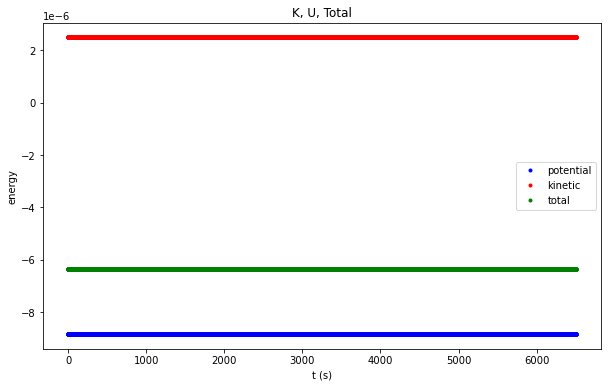

In [6]:
fig = plt.figure(figsize=(10,6))
plt.title("K, U, Total")
plt.plot(t_data, U_data, 'b.', label='potential')
plt.plot(t_data, K_data, 'r.', label='kinetic')
plt.plot(t_data, E_data, 'g.', label='total')
plt.xlabel('t (s)')
plt.ylabel('energy')
plt.legend()
plt.show()

### Unbound Orbit

In [ ]:
v = vector(0,0,0.15)
scene=canvas()

scene.width = 800
scene.height = 600
scene.background = color.white

robs = vector(3,-2,0)

rod = cylinder(pos=vector(-L/2,0,0), axis=vector(L,0,0), radius=rad, color=color.red)
ball = sphere(pos=r0 , radius=rad_ball, color=color.blue, make_trail=True)

t = 0
dt = 0.1
p = m*v



#scene.waitfor('click')
E_data = []
K_data = []
U_data = []
t_data = []


while t<4500:
    rate(1e5)
    
    robs = ball.pos

    g = vec(0,0,0)
    x = -L/2+deltaL/2
    
    V = 0
    
    while x < L/2:
    
        rsource = vec(x,0,0)
        r = robs - rsource
        rmag = mag(r)
        rhat = r/rmag
        
        dg = (-G*dM)/(rmag**2)*rhat
        g = g + dg
        
        dV = -G*dM/rmag
        V = V + dV
        
        x = x + deltaL
    
    U = m*V
    escV = sqrt(-2*U/m)
    F_grav = m*g
    v_circ = sqrt(mag(F_grav)*(2*rad)/m)
    
    p = p + F_grav*dt
    v = p/m
    ball.pos = ball.pos + v*dt
    t = t + dt
    K = 1/2*m*mag(v)**2
    E = K + U
    
    E_data.append(E)
    K_data.append(K)
    U_data.append(U)
    t_data.append(t)


In [ ]:
fig = plt.figure(figsize=(10,6))
plt.title("K, U, Total")
plt.plot(t_data, U_data, 'b.', label='potential')
plt.plot(t_data, K_data, 'r.', label='kinetic')
plt.plot(t_data, E_data, 'g.', label='total')
plt.xlabel('t (s)')
plt.ylabel('energy')
plt.legend()
plt.show()

### Starts at End of Rod

In [ ]:
v = vector(0,0,0.070579)
scene=canvas()

scene.width = 800
scene.height = 600
scene.background = color.white

robs = vector(3,-2,0)

rod = cylinder(pos=vector(-L/2,0,0), axis=vector(L,0,0), radius=rad, color=color.red)
ball = sphere(pos=vector(-L/2,-2*rad,0) , radius=rad_ball, color=color.blue, make_trail=True)

t = 0
dt = 0.1
p = m*v



#scene.waitfor('click')
E_data = []
K_data = []
U_data = []
t_data = []


while t<15500:
    rate(1e9)
    
    robs = ball.pos

    g = vec(0,0,0)
    x = -L/2+deltaL/2
    
    V = 0
    
    while x < L/2:
    
        rsource = vec(x,0,0)
        r = robs - rsource
        rmag = mag(r)
        rhat = r/rmag
        
        dg = (-G*dM)/(rmag**2)*rhat
        g = g + dg
        
        dV = -G*dM/rmag
        V = V + dV
        
        x = x + deltaL
    
    U = m*V
    escV = sqrt(-2*U/m)
    F_grav = m*g
    v_circ = sqrt(mag(F_grav)*(2*rad)/m)
    
    p = p + F_grav*dt
    v = p/m
    ball.pos = ball.pos + v*dt
    t = t + dt
    K = 1/2*m*mag(v)**2
    E = K + U
    
    E_data.append(E)
    K_data.append(K)
    U_data.append(U)
    t_data.append(t)
    
print(escV) 
print(F_grav)
print(v_circ)

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.title("K, U, Total")
plt.plot(t_data, U_data, 'b.', label='potential')
plt.plot(t_data, K_data, 'r.', label='kinetic')
plt.plot(t_data, E_data, 'g.', label='total')
plt.xlabel('t (s)')
plt.ylabel('energy')
plt.legend()
plt.show()

### Results

Now that we have a working program, we can explore different questions. The first question I aimed to answer was, "What if the ball did not start in the middle of the rod?", "Would it still have a circular orbit?" By placing the ball at one end of the rod, I was able to produce the following results: 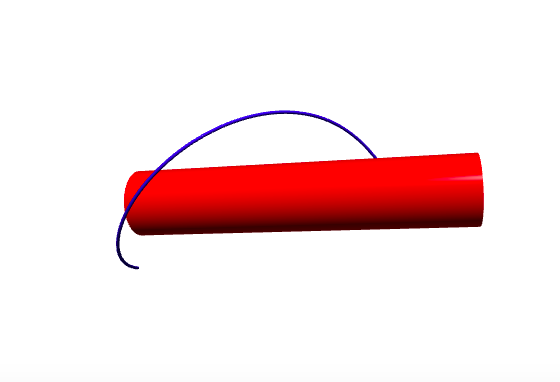

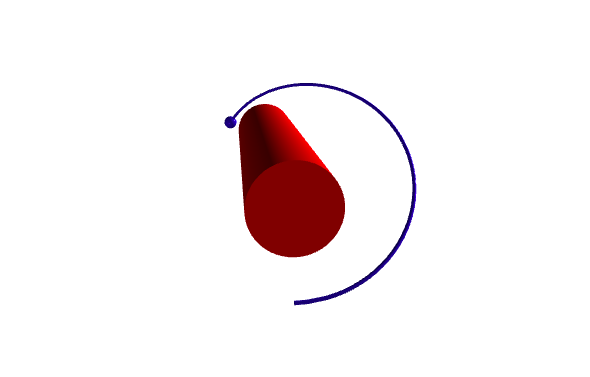

This shows that the ball is still orbiting, but it is also moving down the rod as well. I plotted the energies and this is the result: 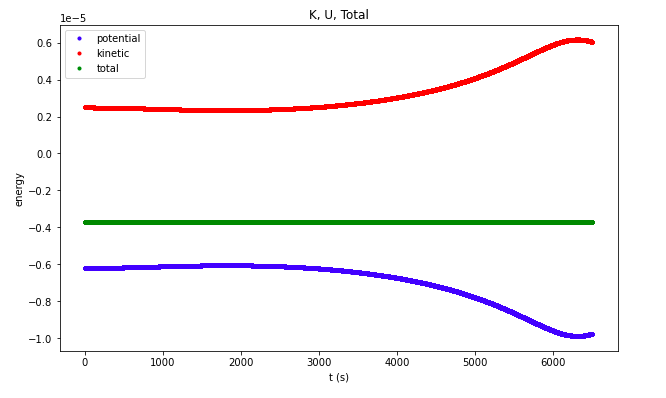

This graph shows that the total energy is constant, which is good. It also shows the total energy being negative, which means the system is still bound. I was interested to see more of this graph so I bumped up the time frame to see this: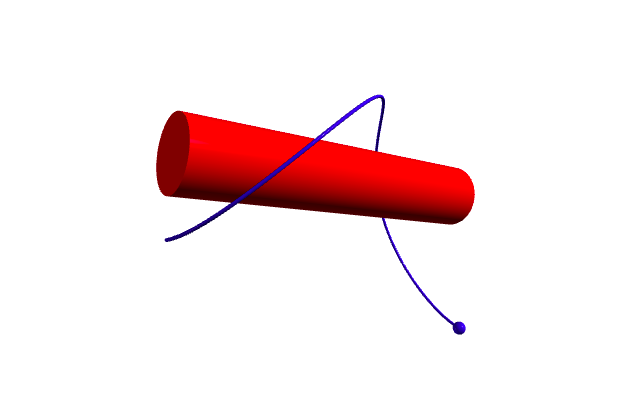

And the energy graph looking like this: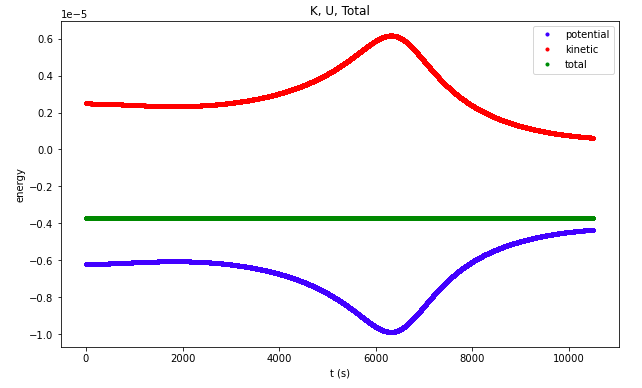

This shows that it is still a bound system and looks like it would then change directions and travel back down to the other end of the rod, so I added a little more time in order to see it start going back to the other side of the rod and this was the results: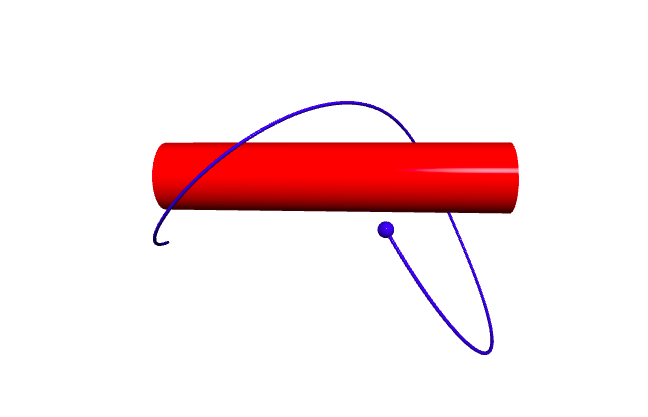

This is what I was expecting to see, you can see it is still bound but the orbit is getting larger. The energy graph looked like this: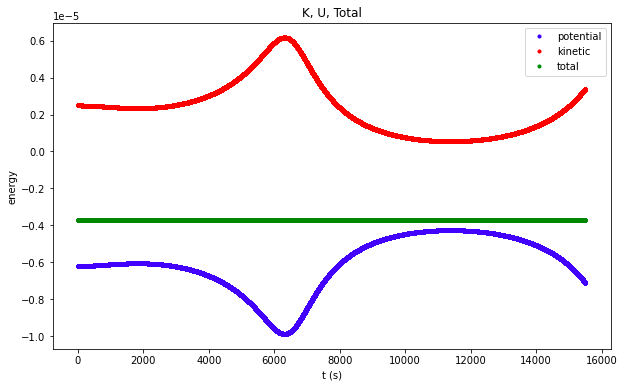

### Validation

In order to validate this, I found the escape speed for the system and tested a number just above the escape speed to see if the system would then become unbound. I found this by using 

$\sqrt{\frac{-2U}{m}}$

The escape speed came out to be 0.13295m/s, so I plugged in 0.15 for the initial velocity to see the results. The scene looked like this: 

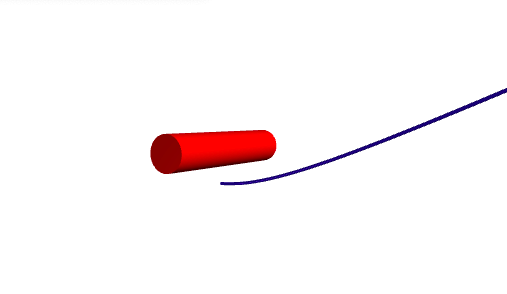

And the energy graph: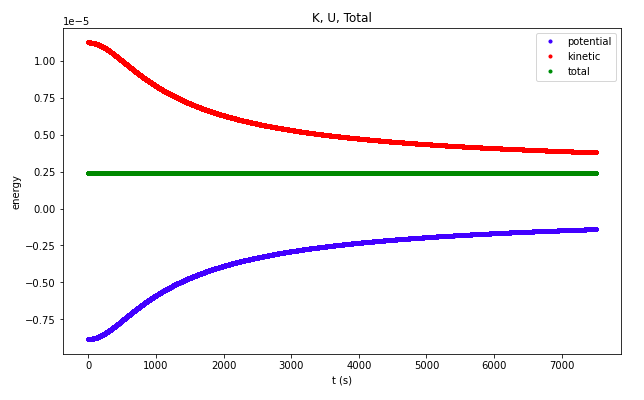

I also found the velocity that was needed to have the orbit be circular by using 

$v = \sqrt{\frac{{F}_{grav}r}{m}}$

this gave me 0.0705789m/s as the speed to make it a circular orbit. This is the speed I used in the original scene. If I change it to a different number, you can see the orbit changes to 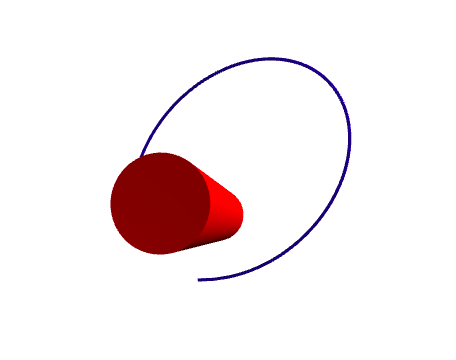 which is more of an oval orbit. This proves that the equations provided accurate numbers for both the escape velocity and the circular orbit.

### References

05-03-cuda lab http://localhost:8888/notebooks/Documents/PHY2200/05-03-cuda-oliviahogan/05-03-cuda.ipynb

https://solarsystem.nasa.gov/asteroids-comets-and-meteors/comets/oumuamua/in-depth/

03-03-damped-driven-pendulum http://localhost:8888/notebooks/Documents/PHY2200/03-03-damped-driven-pendulum-oliviahogan/03-03-damped-driven-pendulum.ipynb

Dr. Titus